In [1]:
#kohli_dot = len(kohli_temp['batsman_runs'] == 0)
    #fours=len(kohli_temp2[batsmam_runs == 4])*4
    #sixes=len(kohli_temp2[batsmam_runs == 6])*6
    #boundaries=fours+sixes
    #boundaries/row['Runs_scored_by_Kohli']

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [3]:
deliveries=pd.read_csv('deliveries.csv')
matches=pd.read_csv('matches.csv')

In [4]:
deliveries.head(5)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [5]:
matches.head(5)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [6]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [7]:
matches['date'] = pd.to_datetime(matches['date'])

In [8]:
matches = matches.sort_values(by='date')
matches

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,1216495,Sharjah,2020-11-03,S Nadeem,Sharjah Cricket Stadium,0,Mumbai Indians,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,10.0,N,NaN,C Shamshuddin,RK Illingworth
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi


In [9]:
matches['season'] = matches['date'].dt.year
matches.head(5)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


In [10]:
batsman=deliveries['batsman'].unique().tolist()
batsman

['RT Ponting',
 'BB McCullum',
 'DJ Hussey',
 'Mohammad Hafeez',
 'SC Ganguly',
 'CL White',
 'MV Boucher',
 'B Akhil',
 'AA Noffke',
 'P Kumar',
 'Z Khan',
 'SB Joshi',
 'W Jaffer',
 'JH Kallis',
 'R Dravid',
 'V Kohli',
 'K Goel',
 'MEK Hussey',
 'JR Hopes',
 'SK Raina',
 'JDP Oram',
 'S Badrinath',
 'PA Patel',
 'ML Hayden',
 'MS Dhoni',
 'KC Sangakkara',
 'Yuvraj Singh',
 'SM Katich',
 'IK Pathan',
 'T Kohli',
 'YK Pathan',
 'S Dhawan',
 'G Gambhir',
 'SK Warne',
 'D Salunkhe',
 'SK Trivedi',
 'V Sehwag',
 'SR Watson',
 'M Kaif',
 'DS Lehmann',
 'RA Jadeja',
 'M Rawat',
 'L Ronchi',
 'ST Jayasuriya',
 'DJ Thornely',
 'RV Uthappa',
 'PR Shah',
 'AM Nayar',
 'SM Pollock',
 'Harbhajan Singh',
 'S Chanderpaul',
 'LRPL Taylor',
 'WP Saha',
 'AS Yadav',
 'A Symonds',
 'SB Bangar',
 'WPUJC Vaas',
 'RP Singh',
 'AC Gilchrist',
 'Y Venugopal Rao',
 'VVS Laxman',
 'RG Sharma',
 'SB Styris',
 'LR Shukla',
 'PP Chawla',
 'Kamran Akmal',
 'DPMD Jayawardene',
 'S Sohal',
 'B Lee',
 'WA Mota',
 '

In [11]:
def list_of_batsman():
    batsman=deliveries['batsman'].unique().tolist()
    return batsman

In [12]:
list_of_batsman()

['RT Ponting',
 'BB McCullum',
 'DJ Hussey',
 'Mohammad Hafeez',
 'SC Ganguly',
 'CL White',
 'MV Boucher',
 'B Akhil',
 'AA Noffke',
 'P Kumar',
 'Z Khan',
 'SB Joshi',
 'W Jaffer',
 'JH Kallis',
 'R Dravid',
 'V Kohli',
 'K Goel',
 'MEK Hussey',
 'JR Hopes',
 'SK Raina',
 'JDP Oram',
 'S Badrinath',
 'PA Patel',
 'ML Hayden',
 'MS Dhoni',
 'KC Sangakkara',
 'Yuvraj Singh',
 'SM Katich',
 'IK Pathan',
 'T Kohli',
 'YK Pathan',
 'S Dhawan',
 'G Gambhir',
 'SK Warne',
 'D Salunkhe',
 'SK Trivedi',
 'V Sehwag',
 'SR Watson',
 'M Kaif',
 'DS Lehmann',
 'RA Jadeja',
 'M Rawat',
 'L Ronchi',
 'ST Jayasuriya',
 'DJ Thornely',
 'RV Uthappa',
 'PR Shah',
 'AM Nayar',
 'SM Pollock',
 'Harbhajan Singh',
 'S Chanderpaul',
 'LRPL Taylor',
 'WP Saha',
 'AS Yadav',
 'A Symonds',
 'SB Bangar',
 'WPUJC Vaas',
 'RP Singh',
 'AC Gilchrist',
 'Y Venugopal Rao',
 'VVS Laxman',
 'RG Sharma',
 'SB Styris',
 'LR Shukla',
 'PP Chawla',
 'Kamran Akmal',
 'DPMD Jayawardene',
 'S Sohal',
 'B Lee',
 'WA Mota',
 '

In [13]:
total_players=len(batsman)
total_players

537

In [14]:
player_matches_ball_by_ball = deliveries[deliveries['batsman'] == 'V Kohli']
player_matches_ball_by_ball.head(5)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
211,335982,2,1,2,V Kohli,W Jaffer,I Sharma,0,0,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
212,335982,2,1,3,V Kohli,W Jaffer,I Sharma,0,4,4,0,0,NaN,NaN,NaN,legbyes,Royal Challengers Bangalore,Kolkata Knight Riders
213,335982,2,1,4,V Kohli,W Jaffer,I Sharma,1,0,1,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
216,335982,2,2,1,V Kohli,W Jaffer,AB Dinda,0,0,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
217,335982,2,2,2,V Kohli,W Jaffer,AB Dinda,0,0,0,0,1,bowled,V Kohli,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders


In [15]:
fours=0
sixes=0
for index,row in player_matches_ball_by_ball.iterrows():
    if row['batsman_runs']==4:
        fours+=1
    if row['batsman_runs']==6:
        sixes+=1
        
print(fours)
print(sixes)

504
202


In [16]:
unique_matches = player_matches_ball_by_ball['id'].unique().tolist()
unique_matches  ## matches player has come to bat

[335982,
 335985,
 335992,
 335996,
 335998,
 336002,
 336006,
 336012,
 336016,
 336023,
 336029,
 336034,
 392182,
 392185,
 392188,
 392191,
 392194,
 392199,
 392204,
 392213,
 392218,
 392224,
 392236,
 392238,
 392239,
 419109,
 419112,
 419119,
 419123,
 419128,
 419133,
 419136,
 419140,
 419145,
 419151,
 419154,
 419157,
 419162,
 501200,
 501205,
 501208,
 501211,
 501222,
 501227,
 501232,
 501244,
 501247,
 501252,
 501255,
 501260,
 501266,
 501268,
 501270,
 501271,
 548310,
 548315,
 548318,
 548324,
 548327,
 548331,
 548336,
 548344,
 548350,
 548356,
 548360,
 548362,
 548367,
 548372,
 548376,
 597999,
 598004,
 598008,
 598012,
 598017,
 598023,
 598027,
 598033,
 598036,
 598042,
 598045,
 598048,
 598054,
 598057,
 598064,
 598068,
 729281,
 729287,
 729299,
 729305,
 729313,
 733977,
 733983,
 733991,
 733999,
 734005,
 734013,
 734021,
 734027,
 734035,
 829713,
 829719,
 829737,
 829745,
 829749,
 829757,
 829763,
 829771,
 829779,
 829785,
 829795,
 829803,
 

In [17]:
len(unique_matches) ## Total no of innings played in IPL

184

In [18]:
## Overall runs scored by player in Ipl
total_runs=player_matches_ball_by_ball['batsman_runs'].sum()
total_runs

5878

In [19]:
bll=len(player_matches_ball_by_ball[player_matches_ball_by_ball['extras_type'] != 'wides'])
bll

4496

In [20]:
sr_overall=total_runs/bll*100
sr_overall

130.73843416370107

In [21]:
player_matches=[] 
for id_match in unique_matches:
    player_df=matches[matches['id']==id_match ]
    player_matches.append(player_df.iloc[0])

In [22]:
player_matches ## info of matches players has batted in it

[id                                      335982
 city                                 Bangalore
 date                       2008-04-18 00:00:00
 player_of_match                    BB McCullum
 venue                    M Chinnaswamy Stadium
 neutral_venue                                0
 team1              Royal Challengers Bangalore
 team2                    Kolkata Knight Riders
 toss_winner        Royal Challengers Bangalore
 toss_decision                            field
 winner                   Kolkata Knight Riders
 result                                    runs
 result_margin                            140.0
 eliminator                                   N
 method                                     NaN
 umpire1                              Asad Rauf
 umpire2                            RE Koertzen
 season                                    2008
 Name: 0, dtype: object,
 id                                      335985
 city                                    Mumbai
 date          

In [23]:
matches_df=pd.DataFrame(player_matches)
matches_df.head(5)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
10,335992,Bangalore,2008-04-26,SR Watson,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,7.0,N,NaN,MR Benson,IL Howell,2008
14,335996,Bangalore,2008-04-28,MS Dhoni,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,13.0,N,NaN,BR Doctrove,RB Tiffin,2008
16,335998,Delhi,2008-04-30,GD McGrath,Feroz Shah Kotla,0,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Delhi Daredevils,runs,10.0,N,NaN,Aleem Dar,I Shivram,2008


In [24]:
mom=0
for index,row in matches_df.iterrows():
    if row['player_of_match'] == 'V Kohli':
        mom +=1

mom

13

In [25]:
## Inning ny inning score of Kohli
runs=[]
for index,row in matches_df.iterrows():
    match_id = row['id']
    player_temp=player_matches_ball_by_ball[player_matches_ball_by_ball['id']== match_id ]
    runs_player=player_temp['batsman_runs'].sum()
    runs.append(runs_player)
    
runs

[1,
 23,
 13,
 12,
 1,
 9,
 34,
 0,
 21,
 3,
 10,
 38,
 3,
 11,
 50,
 2,
 22,
 19,
 16,
 15,
 20,
 38,
 19,
 24,
 7,
 2,
 16,
 17,
 24,
 38,
 34,
 42,
 13,
 58,
 3,
 14,
 37,
 9,
 23,
 12,
 71,
 35,
 30,
 56,
 67,
 27,
 27,
 39,
 15,
 11,
 31,
 70,
 8,
 35,
 8,
 6,
 57,
 22,
 16,
 4,
 16,
 18,
 45,
 9,
 36,
 9,
 3,
 73,
 42,
 24,
 46,
 35,
 58,
 65,
 1,
 11,
 1,
 32,
 25,
 57,
 93,
 99,
 17,
 14,
 56,
 49,
 0,
 31,
 21,
 4,
 0,
 35,
 0,
 4,
 10,
 27,
 67,
 38,
 73,
 13,
 41,
 18,
 51,
 62,
 35,
 1,
 34,
 48,
 32,
 82,
 19,
 44,
 1,
 12,
 12,
 75,
 79,
 33,
 80,
 100,
 14,
 52,
 108,
 20,
 7,
 109,
 75,
 113,
 54,
 0,
 54,
 62,
 28,
 64,
 0,
 10,
 55,
 20,
 6,
 5,
 58,
 31,
 21,
 57,
 92,
 30,
 18,
 68,
 32,
 8,
 39,
 70,
 48,
 12,
 4,
 6,
 46,
 3,
 23,
 84,
 41,
 67,
 8,
 100,
 9,
 13,
 23,
 25,
 16,
 18,
 9,
 7,
 29,
 1,
 72,
 43,
 43,
 90,
 48,
 14,
 33,
 50,
 3,
 6]

In [26]:
matches_df['Runs']=runs
matches_df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season,Runs
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008,1
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008,23
10,335992,Bangalore,2008-04-26,SR Watson,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,7.0,N,NaN,MR Benson,IL Howell,2008,13
14,335996,Bangalore,2008-04-28,MS Dhoni,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,13.0,N,NaN,BR Doctrove,RB Tiffin,2008,12
16,335998,Delhi,2008-04-30,GD McGrath,Feroz Shah Kotla,0,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Delhi Daredevils,runs,10.0,N,NaN,Aleem Dar,I Shivram,2008,1


In [27]:
highest=matches_df['Runs'].max()
highest

113

In [28]:
thirty_plus_scores=0
half_century=0
century=0
ducks=0
for index,row in matches_df.iterrows():
    if row['Runs'] == 0:
        ducks +=1
    if row['Runs'] >= 30 :
        thirty_plus_scores +=1
    if row['Runs'] >= 50:
        half_century += 1
    if row['Runs'] >= 100:
        century +=1
    
    
        
print(thirty_plus_scores)
print(half_century)
print(century)
print(ducks)

84
44
5
6


In [29]:
def overall_stats(player_name):
    player_matches_ball_by_ball = deliveries[deliveries['batsman'] == player_name]
    unique_matches = player_matches_ball_by_ball['id'].unique().tolist()
    innings = len(player_matches_ball_by_ball['id'].unique().tolist())
    total_runs=player_matches_ball_by_ball['batsman_runs'].sum()
    balls=len(player_matches_ball_by_ball[player_matches_ball_by_ball['extras_type'] != 'wides'])
    sr_overall=round(total_runs/balls*100,2)
    fours=0
    sixes=0
    for index,row in player_matches_ball_by_ball.iterrows():
        if row['batsman_runs']==4:
            fours+=1
        if row['batsman_runs']==6:
            sixes+=1
    player_matches=[] 
    for id_match in unique_matches:
        player_df=matches[matches['id']==id_match ]
        player_matches.append(player_df.iloc[0])
    matches_df=pd.DataFrame(player_matches)
    mom=0
    for index,row in matches_df.iterrows():
        if row['player_of_match'] == player_name:
            mom +=1
    runs=[]
    for index,row in matches_df.iterrows():
        match_id = row['id']
        player_temp=player_matches_ball_by_ball[player_matches_ball_by_ball['id']== match_id ]
        runs_player=player_temp['batsman_runs'].sum()
        runs.append(runs_player)
    matches_df['Runs']=runs
    highest=matches_df['Runs'].max()
    thirty_plus_scores=0
    half_century=0
    century=0
    ducks=0
    for index,row in matches_df.iterrows():
        if row['Runs'] == 0:
            ducks +=1
        if row['Runs'] >= 30 :
            thirty_plus_scores +=1
        if row['Runs'] >= 50:
            half_century += 1
        if row['Runs'] >= 100:
            century +=1
    return innings,total_runs,balls,sr_overall,highest,ducks,thirty_plus_scores,half_century,century,mom,fours,sixes
    

In [30]:
def display_overall_stats(player_name):
    innings, total_runs, balls, sr_overall, highest, ducks, thirty_plus_scores, half_century, century, mom, fours, sixes = overall_stats(player_name)

    print(f"Overall Statistics for {player_name} in all IPL seasons:")
    print(f"Innings: {innings}")
    print(f"Total Runs: {total_runs}")
    print(f"Balls Faced: {balls}")
    print(f"Strike Rate: {sr_overall}")
    print(f"Highest Score in a Single Match: {highest}")
    print(f"Ducks: {ducks}")
    print(f"30+ Scores: {thirty_plus_scores}")
    print(f"Half-Centuries: {half_century}")
    print(f"Centuries: {century}")
    print(f"Man of the Match Awards: {mom}")
    print(f"Fours: {fours}")
    print(f"Sixes: {sixes}")


In [31]:
player_name = "V Kohli"
display_overall_stats(player_name)

Overall Statistics for V Kohli in all IPL seasons:
Innings: 184
Total Runs: 5878
Balls Faced: 4496
Strike Rate: 130.74
Highest Score in a Single Match: 113
Ducks: 6
30+ Scores: 84
Half-Centuries: 44
Centuries: 5
Man of the Match Awards: 13
Fours: 504
Sixes: 202


In [32]:
matches_df.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2', 'season',
       'Runs'],
      dtype='object')

In [33]:
fours=[]
sixes=[]
dot_balls=[]
for index,row in matches_df.iterrows():
    match_id = row['id']
    player_temp=player_matches_ball_by_ball[player_matches_ball_by_ball['id']== match_id ]
    four=0
    six=0
    dots=0
    for index,row in player_temp.iterrows():
        if row['batsman_runs']==4:
            four+=1
        if row['batsman_runs']==6:
            six+=1
        if row['batsman_runs']==0:
            dots +=1
    fours.append(four)
    sixes.append(six)
    dot_balls.append(dots)
    
dot_balls

[4,
 6,
 9,
 2,
 0,
 2,
 21,
 1,
 15,
 5,
 10,
 7,
 5,
 9,
 13,
 1,
 6,
 3,
 4,
 10,
 16,
 19,
 2,
 6,
 4,
 3,
 5,
 6,
 4,
 3,
 6,
 3,
 1,
 14,
 2,
 6,
 4,
 4,
 8,
 13,
 19,
 10,
 9,
 18,
 11,
 18,
 18,
 11,
 7,
 8,
 15,
 12,
 4,
 12,
 4,
 11,
 18,
 4,
 7,
 3,
 8,
 11,
 17,
 4,
 5,
 6,
 0,
 17,
 21,
 7,
 21,
 15,
 15,
 19,
 4,
 3,
 3,
 15,
 3,
 16,
 16,
 15,
 5,
 7,
 12,
 12,
 2,
 7,
 13,
 1,
 6,
 11,
 1,
 8,
 3,
 12,
 11,
 9,
 18,
 9,
 24,
 10,
 17,
 9,
 6,
 3,
 7,
 17,
 14,
 11,
 3,
 4,
 1,
 8,
 5,
 17,
 8,
 13,
 24,
 12,
 6,
 10,
 13,
 9,
 6,
 11,
 13,
 16,
 12,
 2,
 12,
 15,
 8,
 17,
 1,
 10,
 15,
 6,
 4,
 5,
 14,
 13,
 7,
 7,
 15,
 8,
 7,
 12,
 8,
 6,
 12,
 11,
 9,
 5,
 5,
 7,
 7,
 7,
 14,
 8,
 5,
 16,
 5,
 12,
 5,
 2,
 6,
 1,
 2,
 6,
 7,
 2,
 7,
 4,
 19,
 15,
 10,
 10,
 7,
 2,
 7,
 9,
 8,
 3]

In [34]:
balls=[]
ten=[]
ten_thirty=[]
thirty_plus=[]
for index,row in matches_df.iterrows():
    match_id = row['id']
    player_temp=player_matches_ball_by_ball[player_matches_ball_by_ball['id']== match_id ]
    player_temp2 = player_temp[player_temp['extras_type']!= 'wides']
    player_balls = len(player_temp[player_temp['extras_type']!= 'wides'])
    balls.append(player_balls)
    if (player_balls <= 10):
        ten.append(player_temp2['batsman_runs'].sum())
        ten_thirty.append(np.nan)
        thirty_plus.append(np.nan)
    elif (player_balls > 10) & (player_balls <= 30):
        ten.append(player_temp2.iloc[0:10]['batsman_runs'].sum())
        ten_thirty.append(player_temp2.iloc[10:]['batsman_runs'].sum())
        thirty_plus.append(np.nan)
    else :
        ten.append(player_temp2.iloc[0:10]['batsman_runs'].sum())
        ten_thirty.append(player_temp2.iloc[10:30]['batsman_runs'].sum())
        thirty_plus.append(player_temp2.iloc[30:]['batsman_runs'].sum())

In [35]:
matches_df['Balls']=balls
matches_df['Dot_balls']=dot_balls
matches_df['Runs_0-10']=ten
matches_df['Runs_10-30']=ten_thirty
matches_df['Runs_30+']=thirty_plus
matches_df['Fours']=fours
matches_df['Sixes']=sixes
matches_df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,...,umpire2,season,Runs,Balls,Dot_balls,Runs_0-10,Runs_10-30,Runs_30+,Fours,Sixes
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,RE Koertzen,2008,1,5,4,1,NaN,NaN,0,0
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,...,DJ Harper,2008,23,14,6,12,11.0,NaN,3,1
10,335992,Bangalore,2008-04-26,SR Watson,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,...,IL Howell,2008,13,14,9,13,0.0,NaN,0,1
14,335996,Bangalore,2008-04-28,MS Dhoni,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,bat,...,RB Tiffin,2008,12,7,2,12,NaN,NaN,2,0
16,335998,Delhi,2008-04-30,GD McGrath,Feroz Shah Kotla,0,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,...,I Shivram,2008,1,1,0,1,NaN,NaN,0,0


In [36]:
matches_df['Strike_Rate']=matches_df['Runs']/matches_df['Balls']*100
matches_df['Dot_ball%']=matches_df['Dot_balls']/matches_df['Balls']*100
matches_df['Boundary%']=(matches_df['Fours']*4+matches_df['Sixes']*6)/matches_df['Runs']*100
matches_df.head(5)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,...,Balls,Dot_balls,Runs_0-10,Runs_10-30,Runs_30+,Fours,Sixes,Strike_Rate,Dot_ball%,Boundary%
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,5,4,1,NaN,NaN,0,0,20.000000,80.000000,0.000000
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,...,14,6,12,11.0,NaN,3,1,164.285714,42.857143,78.260870
10,335992,Bangalore,2008-04-26,SR Watson,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,...,14,9,13,0.0,NaN,0,1,92.857143,64.285714,46.153846
14,335996,Bangalore,2008-04-28,MS Dhoni,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,bat,...,7,2,12,NaN,NaN,2,0,171.428571,28.571429,66.666667
16,335998,Delhi,2008-04-30,GD McGrath,Feroz Shah Kotla,0,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,...,1,0,1,NaN,NaN,0,0,100.000000,0.000000,0.000000


In [37]:
matches_df.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2', 'season',
       'Runs', 'Balls', 'Dot_balls', 'Runs_0-10', 'Runs_10-30', 'Runs_30+',
       'Fours', 'Sixes', 'Strike_Rate', 'Dot_ball%', 'Boundary%'],
      dtype='object')

In [38]:
season_df=matches_df[['season','Runs', 'Balls', 'Dot_balls', 'Runs_0-10', 'Runs_10-30', 'Runs_30+',
       'Fours', 'Sixes', 'Strike_Rate', 'Dot_ball%', 'Boundary%']]
season_df

,season,Runs,Balls,Dot_balls,Runs_0-10,Runs_10-30,Runs_30+,Fours,Sixes,Strike_Rate,Dot_ball%,Boundary%
0,2008,1,5,4,1,NaN,NaN,0,0,20.000000,80.000000,0.000000
3,2008,23,14,6,12,11.0,NaN,3,1,164.285714,42.857143,78.260870
10,2008,13,14,9,13,0.0,NaN,0,1,92.857143,64.285714,46.153846
14,2008,12,7,2,12,NaN,NaN,2,0,171.428571,28.571429,66.666667
16,2008,1,1,0,1,NaN,NaN,0,0,100.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
798,2020,14,13,2,12,2.0,NaN,0,0,107.692308,15.384615,0.000000
804,2020,33,28,7,9,24.0,NaN,1,0,117.857143,25.000000,12.121212
808,2020,50,43,9,16,20.0,14.0,1,1,116.279070,20.930233,20.000000
811,2020,3,11,8,3,0.0,NaN,0,0,27.272727,72.727273,0.000000


In [39]:
player_season = season_df.groupby(['season'])
season_stats=player_season.mean()
season_stats=season_stats.round(decimals=2)
season_stats


,Runs,Balls,Dot_balls,Runs_0-10,Runs_10-30,Runs_30+,Fours,Sixes,Strike_Rate,Dot_ball%,Boundary%
season,,,,,,,,,,,
2008,13.75,13.08,6.83,6.67,13.00,7.00,1.50,0.33,96.24,53.36,45.19
2009,18.92,16.85,7.54,8.77,13.00,7.50,1.69,0.62,108.98,43.40,46.05
2010,23.62,16.31,4.69,10.62,16.00,9.00,2.00,0.92,129.44,34.25,47.34
2011,34.81,28.75,12.06,11.56,17.75,11.00,3.44,1.00,113.63,44.54,54.64
2012,24.27,21.73,9.07,8.07,12.55,26.25,2.20,0.67,115.79,43.28,50.46
2013,39.62,28.56,11.00,11.81,19.46,27.43,4.00,1.38,123.57,44.70,51.08
2014,25.64,21.00,8.14,6.00,23.78,15.25,1.64,1.14,95.44,55.25,55.92
2015,31.56,24.12,9.25,9.69,19.92,22.20,2.19,1.44,123.33,43.01,48.41
2016,60.81,40.00,11.50,12.50,25.71,37.55,5.25,2.38,133.43,37.37,54.33


In [40]:
def seasonwise_stats(player_name):
    player_matches_ball_by_ball = deliveries[deliveries['batsman'] == player_name]
    unique_matches = player_matches_ball_by_ball['id'].unique().tolist()
    player_matches=[] 
    for id_match in unique_matches:
        player_df=matches[matches['id']==id_match ]
        player_matches.append(player_df.iloc[0])
    matches_df=pd.DataFrame(player_matches)
    runs=[]
    for index,row in matches_df.iterrows():
        match_id = row['id']
        player_temp=player_matches_ball_by_ball[player_matches_ball_by_ball['id']== match_id ]
        runs_player=player_temp['batsman_runs'].sum()
        runs.append(runs_player)
    matches_df['Runs']=runs
    fours=[]
    sixes=[]
    dot_balls=[]
    for index,row in matches_df.iterrows():
        match_id = row['id']
        player_temp=player_matches_ball_by_ball[player_matches_ball_by_ball['id']== match_id ]
        four=0
        six=0
        dots=0
        for index,row in player_temp.iterrows():
            if row['batsman_runs']==4:
                four+=1
            if row['batsman_runs']==6:
                six+=1
            if row['batsman_runs']==0:
                dots +=1
        fours.append(four)
        sixes.append(six)
        dot_balls.append(dots)
        
    balls=[]
    ten=[]
    ten_thirty=[]
    thirty_plus=[]
    for index,row in matches_df.iterrows():
        match_id = row['id']
        player_temp=player_matches_ball_by_ball[player_matches_ball_by_ball['id']== match_id ]
        player_temp2 = player_temp[player_temp['extras_type']!= 'wides']
        player_balls = len(player_temp[player_temp['extras_type']!= 'wides'])
        balls.append(player_balls)
        if (player_balls <= 10):
            ten.append(player_temp2['batsman_runs'].sum())
            ten_thirty.append(np.nan)
            thirty_plus.append(np.nan)
        elif (player_balls > 10) & (player_balls <= 30):
            ten.append(player_temp2.iloc[0:10]['batsman_runs'].sum())
            ten_thirty.append(player_temp2.iloc[10:]['batsman_runs'].sum())
            thirty_plus.append(np.nan)
        else :
            ten.append(player_temp2.iloc[0:10]['batsman_runs'].sum())
            ten_thirty.append(player_temp2.iloc[10:30]['batsman_runs'].sum())
            thirty_plus.append(player_temp2.iloc[30:]['batsman_runs'].sum())
    
    matches_df['Balls']=balls
    matches_df['Dot_balls']=dot_balls
    matches_df['Runs_0-10']=ten
    matches_df['Runs_10-30']=ten_thirty
    matches_df['Runs_30+']=thirty_plus
    matches_df['Fours']=fours
    matches_df['Sixes']=sixes
    matches_df['Strike_Rate']=matches_df['Runs']/matches_df['Balls']*100
    matches_df['Dot_ball%']=matches_df['Dot_balls']/matches_df['Balls']*100
    matches_df['Boundary%']=(matches_df['Fours']*4+matches_df['Sixes']*6)/matches_df['Runs']*100
    season_df=matches_df[['season','Runs', 'Balls', 'Dot_balls', 'Runs_0-10', 'Runs_10-30', 'Runs_30+',
       'Fours', 'Sixes', 'Strike_Rate', 'Dot_ball%', 'Boundary%']]
    player_season = season_df.groupby(['season'])
    season_stats=player_season.mean()
    season_stats=season_stats.round(decimals=2)
    return season_stats

In [41]:
seasonwise_stats('V Kohli')

,Runs,Balls,Dot_balls,Runs_0-10,Runs_10-30,Runs_30+,Fours,Sixes,Strike_Rate,Dot_ball%,Boundary%
season,,,,,,,,,,,
2008,13.75,13.08,6.83,6.67,13.00,7.00,1.50,0.33,96.24,53.36,45.19
2009,18.92,16.85,7.54,8.77,13.00,7.50,1.69,0.62,108.98,43.40,46.05
2010,23.62,16.31,4.69,10.62,16.00,9.00,2.00,0.92,129.44,34.25,47.34
2011,34.81,28.75,12.06,11.56,17.75,11.00,3.44,1.00,113.63,44.54,54.64
2012,24.27,21.73,9.07,8.07,12.55,26.25,2.20,0.67,115.79,43.28,50.46
2013,39.62,28.56,11.00,11.81,19.46,27.43,4.00,1.38,123.57,44.70,51.08
2014,25.64,21.00,8.14,6.00,23.78,15.25,1.64,1.14,95.44,55.25,55.92
2015,31.56,24.12,9.25,9.69,19.92,22.20,2.19,1.44,123.33,43.01,48.41
2016,60.81,40.00,11.50,12.50,25.71,37.55,5.25,2.38,133.43,37.37,54.33


In [42]:
def visual_stats(player_name):
    player_matches_ball_by_ball = deliveries[deliveries['batsman'] == player_name]
    unique_matches = player_matches_ball_by_ball['id'].unique().tolist()
    player_matches=[] 
    for id_match in unique_matches:
        player_df=matches[matches['id']==id_match ]
        player_matches.append(player_df.iloc[0])
    matches_df=pd.DataFrame(player_matches)
    runs=[]
    for index,row in matches_df.iterrows():
        match_id = row['id']
        player_temp=player_matches_ball_by_ball[player_matches_ball_by_ball['id']== match_id ]
        runs_player=player_temp['batsman_runs'].sum()
        runs.append(runs_player)
    matches_df['Runs']=runs
    fours=[]
    sixes=[]
    dot_balls=[]
    for index,row in matches_df.iterrows():
        match_id = row['id']
        player_temp=player_matches_ball_by_ball[player_matches_ball_by_ball['id']== match_id ]
        four=0
        six=0
        dots=0
        for index,row in player_temp.iterrows():
            if row['batsman_runs']==4:
                four+=1
            if row['batsman_runs']==6:
                six+=1
            if row['batsman_runs']==0:
                dots +=1
        fours.append(four)
        sixes.append(six)
        dot_balls.append(dots)
        
    balls=[]
    ten=[]
    ten_thirty=[]
    thirty_plus=[]
    for index,row in matches_df.iterrows():
        match_id = row['id']
        player_temp=player_matches_ball_by_ball[player_matches_ball_by_ball['id']== match_id ]
        player_temp2 = player_temp[player_temp['extras_type']!= 'wides']
        player_balls = len(player_temp[player_temp['extras_type']!= 'wides'])
        balls.append(player_balls)
        if (player_balls <= 10):
            ten.append(player_temp2['batsman_runs'].sum())
            ten_thirty.append(np.nan)
            thirty_plus.append(np.nan)
        elif (player_balls > 10) & (player_balls <= 30):
            ten.append(player_temp2.iloc[0:10]['batsman_runs'].sum())
            ten_thirty.append(player_temp2.iloc[10:]['batsman_runs'].sum())
            thirty_plus.append(np.nan)
        else :
            ten.append(player_temp2.iloc[0:10]['batsman_runs'].sum())
            ten_thirty.append(player_temp2.iloc[10:30]['batsman_runs'].sum())
            thirty_plus.append(player_temp2.iloc[30:]['batsman_runs'].sum())
    
    matches_df['Balls']=balls
    matches_df['Dot_balls']=dot_balls
    matches_df['Runs_0-10']=ten
    matches_df['Runs_10-30']=ten_thirty
    matches_df['Runs_30+']=thirty_plus
    matches_df['Fours']=fours
    matches_df['Sixes']=sixes
    matches_df['Strike_Rate']=matches_df['Runs']/matches_df['Balls']*100
    matches_df['Dot_ball%']=matches_df['Dot_balls']/matches_df['Balls']*100
    matches_df['Boundary%']=(matches_df['Fours']*4+matches_df['Sixes']*6)/matches_df['Runs']*100
    season_df=matches_df[['season','Runs', 'Balls', 'Dot_balls', 'Runs_0-10', 'Runs_10-30', 'Runs_30+',
       'Fours', 'Sixes', 'Strike_Rate', 'Dot_ball%', 'Boundary%']]
    player_season = season_df.groupby(['season'])
    season_stats=player_season.mean()
    season_stats=season_stats.round(decimals=2)
    
    fig, axes = plt.subplots(2, 2, figsize=(20, 10), sharex=True)
    fig.suptitle('BATTING PERFORMANCE OF PLAYER OVER THE SEASONS')

    sns.barplot(ax=axes[0,0], x=season_stats.index.tolist(), y=season_stats['Runs'].tolist(),color="red")
    axes[0,0].set_title('Average runs per season')

    sns.barplot(ax=axes[0,1], x=season_stats.index.tolist(), y=season_stats['Strike_Rate'].tolist(),color="red")
    axes[0,1].set_title('Strike Rate per season')

    sns.barplot(ax=axes[1,0], x=season_stats.index.tolist(), y=season_stats['Dot_ball%'].tolist(),color="red")
    axes[1,0].set_title('Dot Ball percent per season')

    sns.barplot(ax=axes[1,1], x=season_stats.index.tolist(), y=season_stats['Boundary%'].tolist(),color="red")
    axes[1,1].set_title('Boundary percent per season')
    return plt.show()
    

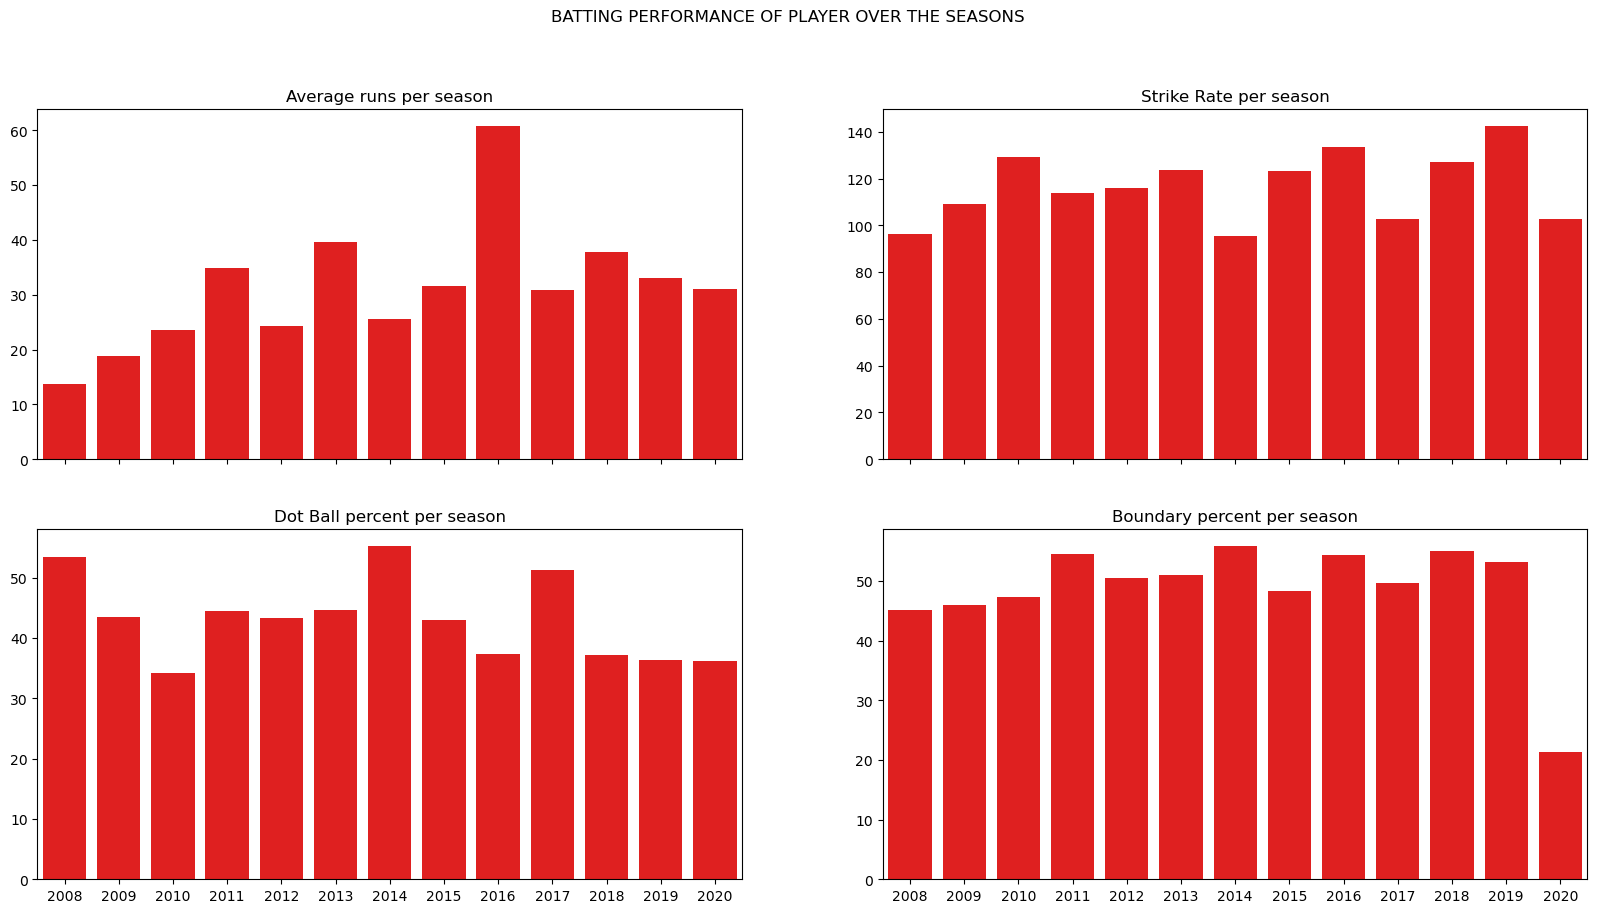

In [43]:
visual_stats('V Kohli')